In [296]:
import numpy as np
import keras
import seaborn as sns
import pandas as pd
import sklearn as sk

In [297]:
#Importing CSV data into a Pandas dataframe
X = pd.read_csv('housing.csv')

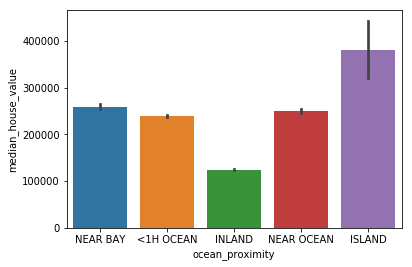

In [298]:
#Plotting proximity to ocean versus cost
sns.barplot(x = 'ocean_proximity', y = 'median_house_value', data = X)

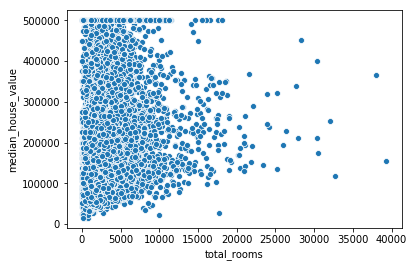

In [299]:
#Plotting rooms versus cost
sns.scatterplot(x = 'total_rooms', y = 'median_house_value', data = X)

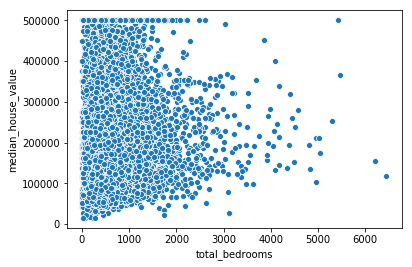

In [300]:
#Plotting bedrooms versus cost
sns.scatterplot(x = 'total_bedrooms', y = 'median_house_value', data = X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e38d588>,
      dtype=object)

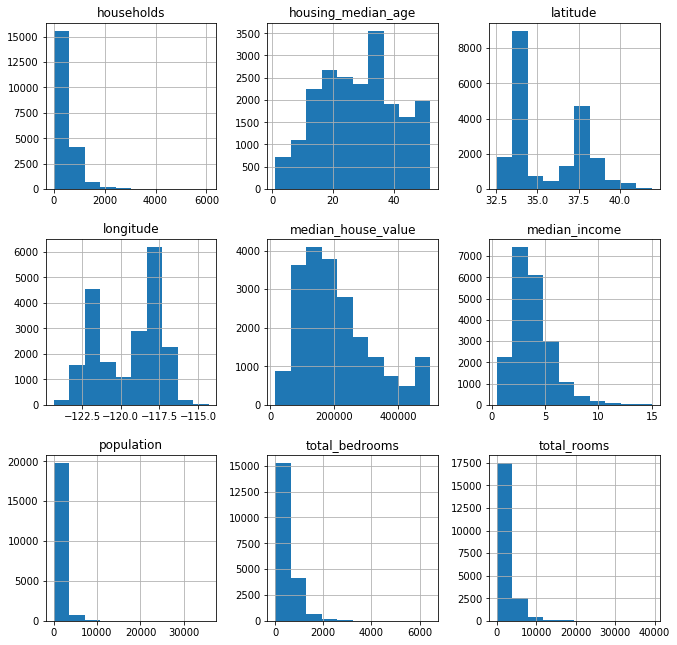

In [301]:
#Checking the distribution of our quantitative variables
X[X.dtypes[(X.dtypes=="float64")|(X.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [302]:
#Before preprocessing our data we need to convert categories with string values to floats
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['ocean_proximity'] = le.fit_transform(X['ocean_proximity'].astype(str))

In [303]:
#Preprocessing our data since scales are incomparable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                                'population', 'households', 'median_income', 'ocean_proximity']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [304]:
#Separating our data into training and test sets
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
Y = X[7]
X = X.drop([7], axis = 1)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [305]:
#Fitting linear regression model to data
from sklearn.linear_model import LinearRegression
xTrain = xTrain.fillna(0)
xTest = xTest.fillna(0)
reg = LinearRegression().fit(xTrain, yTrain)

In [311]:
#How well our linear regression model performs on the train set
reg.score(xTrain, yTrain)

0.3985784239882122

In [312]:
#How well our linear regression model performs on the test set
reg.score(xTest, yTest)

0.38864684804407423

In [376]:
#Fitting deep neural network to data
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 64, input_shape = (8, ), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'relu'))
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs = 32, batch_size = 32)

Epoch 1/32
16512/16512 [==============================] - 1s 79us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 2/32
16512/16512 [==============================] - 1s 37us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 3/32
16512/16512 [==============================] - 1s 37us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 4/32
16512/16512 [==============================] - 1s 42us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 5/32
16512/16512 [==============================] - 1s 39us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 6/32
16512/16512 [==============================] - 1s 36us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 7/32
16512/16512 [==============================] - 1s 37us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 8/32
16512/16512 [==============================] - 1s 37us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 9/32
16512/16512 [==============================] - 1s 37us/step - loss: 0.0715 - acc: 6.6618e-04
Epoch 10/32
16512/16512 [==============================] - 1s 37

In [377]:
#Checking our metrics on the train set
model.evaluate(xTrain, yTrain)

16512/16512 [==============================] - 1s 31us/step


[0.07151131414945504, 0.0006661821705426356]

In [378]:
#Checking our metrics on the test set
model.evaluate(xTest, yTest)

4128/4128 [==============================] - 0s 26us/step


[0.06997928187944168, 0.00024224806201550387]

In [420]:
#More effectively visualizing accuracy by seeing the difference between actual values and predicted values
yTestPred = model.predict(xTest)
yTest - yTestPred

array([[0.2518517 ],
       [0.36411222],
       [0.26543082],
       ...,
       [0.18639743],
       [0.38921532],
       [0.19535593]])

In [440]:
#Fitting neural network with dropout regularization
from keras import layers
dropModel = Sequential()
dropModel.add(Dense(input_shape = (8, ), units = 64, activation = 'relu'))
dropModel.add(layers.Dropout(.2))
dropModel.add(Dense(units = 32, activation = 'tanh'))
dropModel.add(layers.Dropout(.2))
dropModel.add(Dense(units = 32, activation = 'tanh'))
dropModel.add(layers.Dropout(.2))
dropModel.add(Dense(units = 1, activation = 'tanh'))
dropModel.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])
dropModel.fit(xTrain, yTrain, epochs = 32, batch_size = 32)

Epoch 1/32
16512/16512 [==============================] - 2s 103us/step - loss: 0.0195 - acc: 6.6618e-04
Epoch 2/32
16512/16512 [==============================] - 1s 45us/step - loss: 0.0142 - acc: 6.6618e-04
Epoch 3/32
16512/16512 [==============================] - 1s 61us/step - loss: 0.0114 - acc: 6.6618e-04 - loss: 0.0122 - a
Epoch 4/32
16512/16512 [==============================] - 1s 54us/step - loss: 0.0100 - acc: 9.0843e-04
Epoch 5/32
16512/16512 [==============================] - 1s 42us/step - loss: 0.0093 - acc: 0.0012
Epoch 6/32
16512/16512 [==============================] - 1s 47us/step - loss: 0.0090 - acc: 0.0013
Epoch 7/32
16512/16512 [==============================] - 1s 47us/step - loss: 0.0086 - acc: 0.0013
Epoch 8/32
16512/16512 [==============================] - 1s 42us/step - loss: 0.0085 - acc: 0.0011
Epoch 9/32
16512/16512 [==============================] - 1s 48us/step - loss: 0.0083 - acc: 0.0013
Epoch 10/32
16512/16512 [==============================] - 1s 44

In [441]:
#Evaluating dropout model on the training set
dropModel.evaluate(xTrain, yTrain)

16512/16512 [==============================] - 1s 57us/step


[0.006081436512100171, 0.001816860465116279]

In [442]:
#Evaluating our dropout model on the test set
dropModel.evaluate(xTest, yTest)

4128/4128 [==============================] - 0s 34us/step


[0.005950924857382396, 0.001937984496124031]

In [443]:
#Seeing effectiveness of dropout model by comparing predicted and actual
yTestPredDrop = dropModel.predict(xTest)
yTest - yTestPred

array([[0.2518517 ],
       [0.36411222],
       [0.26543082],
       ...,
       [0.18639743],
       [0.38921532],
       [0.19535593]])